Linear Least Squares, Exercise 2, ARX

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from ex15_2_lib import ARX, generate_arx_data, generate_u_data1, generate_u_data2
from ex15_1_lib import run_linear_least_squares_estimation, plotgraph

In [30]:
# A linear ARX model
# defines the model function f(x) = f([Y,U]) = f([yk-1, ..., yk-na, uk, ..., uk-nb+1])
f_arx = lambda x: x
pa = 5
pb = 2
p = pa + pb
params = np.random.rand(p)-0.5
Y0 = np.zeros(pa)
U0 = np.zeros(pb)
arx1 = ARX(Y0,U0,params,f_arx)

In [31]:
# A non-linear ARX model
# defines the f(x) = f([Y,U]) = f([yk-1, ..., yk-na, uk, ..., uk-nb-1])
f_arx = lambda x: np.array([ x[0]*x[1], 1 + x[2]*np.sin(x[0])])
pa = 2
pb = 1
p = 2
params = np.random.rand(p)-0.5
Y0 = np.zeros(pa)
U0 = np.zeros(pb)
arx1 = ARX(Y0,U0,params,f_arx)

Real parameters [-0.35795222  0.43510047]
Estimated parameters: [-0.35423254  0.43458423]


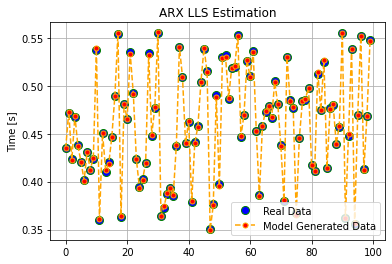

In [32]:
# Generate the data set
n = 100
sigma_output = 0.001
data_in = generate_u_data1(n,0,1)
data_out = generate_arx_data(arx1,data_in,sigma_output)

# Estimation: 1) build the input vectors as expected by LS
X = []
Y = Y0
U = U0
for i in range(n):
  U = np.roll(U,1); U[0] = data_in[i]
  X.append(np.concatenate([Y,U]))
  Y = np.roll(Y,1); Y[0] = data_out[i]
X = np.array(X)

# Estimation: 2) run LS 
est_params, cov_params = run_linear_least_squares_estimation(X, data_out, f_arx)

# Results
print("Real parameters", params)
print("Estimated parameters:", est_params)
arx1_est = ARX(Y0,U0,est_params,f_arx)

data_k = np.arange(data_in.shape[0])
plotgraph(data_k,data_out,data_k,generate_arx_data(arx1_est,data_in,0),"ARX LLS Estimation")